In [10]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [11]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [12]:
# Determine if there are any outliers in the "ASK_AMT" column

# create a list of the values in the ASK_AMT column
ask_amounts = application_df["ASK_AMT"].values

 # Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amounts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [amt for amt in ask_amounts if amt < lower_bound or amt > upper_bound]

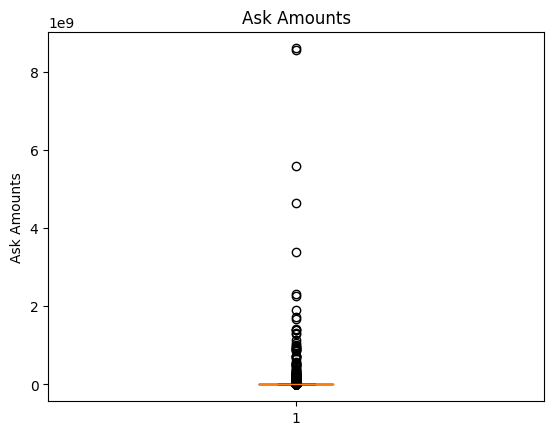

In [13]:
# Plot the ASK_AMT column data to visibly see outliers
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amounts')
ax1.set_ylabel('Ask Amounts')
ax1.boxplot(ask_amounts)
plt.show()

In [14]:
# Get summary statistics on the ask amt column
application_df["ASK_AMT"].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [15]:
# Get the length of the df before removing outliers
len(application_df)

34299

In [16]:
# Calculate the Z-scores for the "ASK_AMT" column
z_scores = (application_df["ASK_AMT"] - application_df["ASK_AMT"].mean()) / application_df["ASK_AMT"].std()

# Define a threshold for Z-scores to identify outliers
threshold = 3

# Filter rows without outliers in the "ASK_AMT" column
application_df = application_df.loc[abs(z_scores) < threshold]

In [17]:
# Get the length of the df after removing outliers, this does remove around 8000 rows of data
len(application_df)

34246

In [19]:
# Convert categorical data to numeric with pd.get_dummies
# Separate out the string data into a dataframe
string_data = application_df.select_dtypes(include='object')

# Apply get dummies to the string data
string_dummies = pd.get_dummies(string_data, drop_first=True, dtype=int)

# Merge the encoded data back into the application_df, making sure to drop the original categorical columns
merged_df = pd.concat([application_df, string_dummies], axis=1)
merged_df = merged_df.drop(string_data.columns, axis=1)

merged_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [20]:
# Split our preprocessed data into our features and target arrays
X = merged_df.drop("IS_SUCCESSFUL", axis=1)
y = merged_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Determine the number of input features
input_features = X_train.shape[1]
hidden_layer1_nodes = 20
hidden_layer2_nodes = 10

# Define the model
nn = tf.keras.models.Sequential()

# Add the input layer
nn.add(tf.keras.layers.InputLayer(input_shape=(input_features,)))

# Add one or more hidden layers with the desired number of nodes
nn.add(tf.keras.layers.Dense(units=hidden_layer1_nodes, activation='relu'))
nn.add(tf.keras.layers.Dense(units=hidden_layer2_nodes, activation='relu'))

# Add the output layer with one node for binary classification
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                2200      
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2421 (9.46 KB)
Trainable params: 2421 (9.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
857/857 [==============================] - 2s 2ms/step - loss: 0.5984 - accuracy: 0.6996
Epoch 2/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5594 - accuracy: 0.7279
Epoch 3/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7302
Epoch 4/100
857/857 [==============================] - 2s 2ms/step - loss: 0.5493 - accuracy: 0.7304
Epoch 5/100
857/857 [==============================] - 2s 2ms/step - loss: 0.5474 - accuracy: 0.7320
Epoch 6/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5460 - accuracy: 0.7325
Epoch 7/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5450 - accuracy: 0.7330
Epoch 8/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5448 - accuracy: 0.7342
Epoch 9/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5440 - accuracy: 0.7343
Epoch 10/100
857/857 [==============================] - 1s 2ms/step - loss: 0.5434 - accura

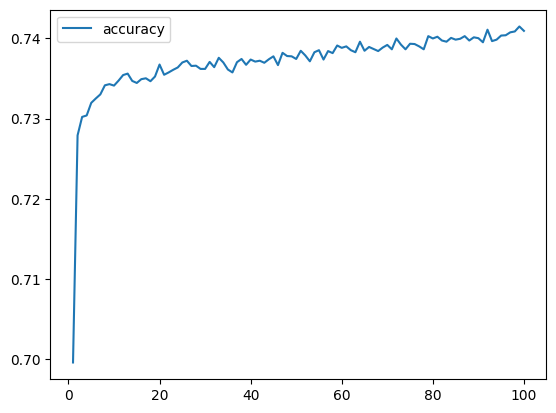

In [25]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy over epochs
history_df.plot(y="accuracy")
plt.show()

In [26]:
# Export our model to HDF5 file
nn.save_weights('AlphabetSoupCharity_Optimization.h5')